In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

df_temp = pd.read_csv("/workspaces/test_repo2/wetter.csv")

df_temp.head(10)


,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,2012-01-01,8.0,9.825000,14,58.0
1,2012-01-02,7.0,7.437500,12,NaN
2,2012-01-03,8.0,5.537500,18,63.0
3,2012-01-04,4.0,5.687500,19,80.0
4,2012-01-05,6.0,5.300000,23,80.0
5,2012-01-06,3.0,2.625000,10,NaN
6,2012-01-07,7.0,6.528571,14,61.0
7,2012-01-08,7.0,5.962500,10,80.0
8,2012-01-09,8.0,5.150000,12,61.0
9,2012-01-10,6.0,6.112500,10,NaN


In [3]:
overall_avg_temp = df_temp['Temperatur'].mean()
print(f"Overall Average Temperature: {overall_avg_temp:.2f}")

Overall Average Temperature: 12.10


In [4]:
if 'Datum' in df_temp.columns and 'Temperatur' in df_temp.columns:
        # Convert the 'date' column to datetime
        df_temp['date'] = pd.to_datetime(df_temp['Datum'], format='%Y-%m-%d' , errors='coerce')
        
        # Filter for the month of July
        july_data = df_temp[df_temp['date'].dt.month == 7]
        
        # Calculate the average temperature for July
        if not july_data.empty:
            july_avg_temp = july_data['Temperatur'].mean()
            print(f"Average Temperature for July: {july_avg_temp:.2f}")
        else:
            print("No data available for the month of July.")

Average Temperature for July: 20.75


In [5]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [6]:
from scipy.stats import ttest_ind

# Filter data for May
may_data = df_temp[df_temp['date'].dt.month == 5]

# Check if both datasets are non-empty
if not july_data.empty and not may_data.empty:
    # Perform t-test
    t_stat, p_value = ttest_ind(july_data['Temperatur'], may_data['Temperatur'], equal_var=False)
    print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
    print(f"Average Temperature in May: {may_data['Temperatur'].mean()}")
    print(f"Average Temperature in July: {july_data['Temperatur'].mean()}")
    # Interpret the result
    if p_value < 0.05:
        print("The average temperatures for July and May differ significantly.")
    else:
        print("No significant difference in average temperatures for July and May.")
else:
    print("Insufficient data for comparison.")

T-statistic: 15.94, P-value: 0.0000
Average Temperature in May: 15.244362036290322
Average Temperature in July: 20.75114227125506
The average temperatures for July and May differ significantly.


In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


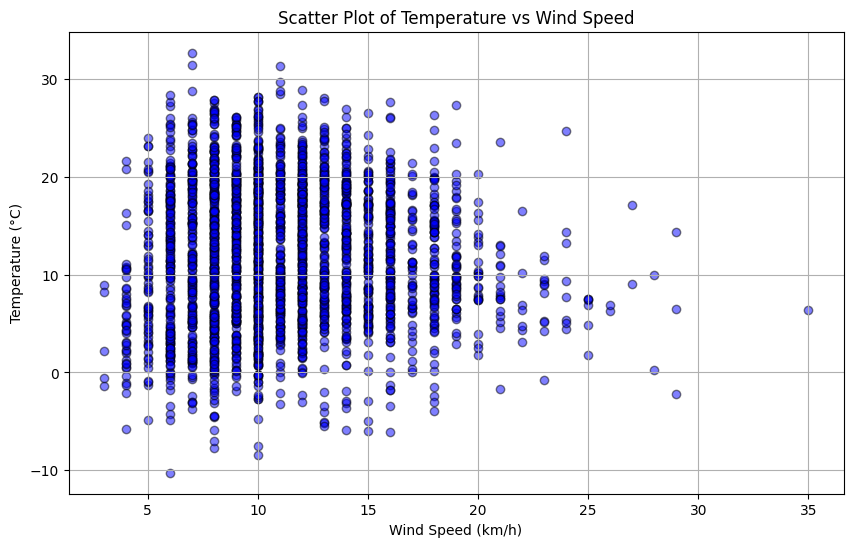

In [8]:
import matplotlib.pyplot as plt

# Scatter plot of Temperature vs Wind Speed
plt.figure(figsize=(10, 6))
plt.scatter(df_temp['Windgeschwindigkeit'], df_temp['Temperatur'], alpha=0.5, c='blue', edgecolors='k')
plt.title('Scatter Plot of Temperature vs Wind Speed')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

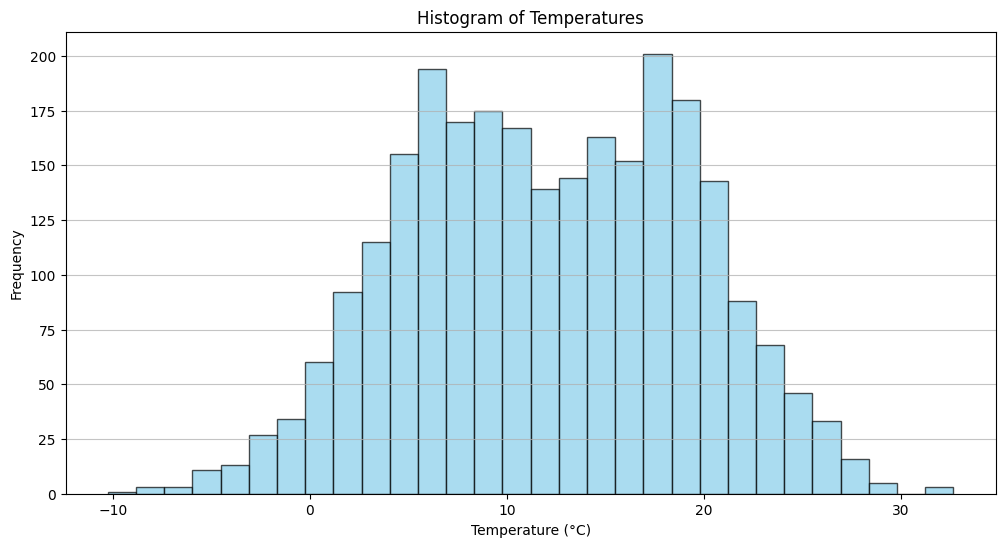

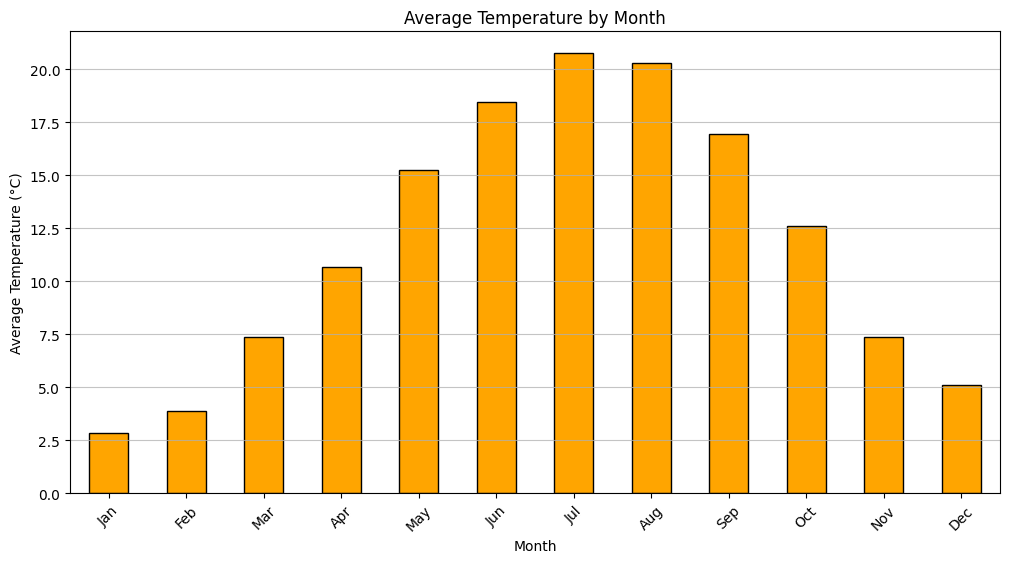

In [9]:
# Histogram of temperatures
plt.figure(figsize=(12, 6))
plt.hist(df_temp['Temperatur'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Temperatures')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Bar chart of average temperature by month
df_temp['month'] = df_temp['date'].dt.month
avg_temp_by_month = df_temp.groupby('month')['Temperatur'].mean()

plt.figure(figsize=(12, 6))
avg_temp_by_month.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()